In [1]:
from FLAI import data
from FLAI import causal_graph
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


## Prepare Data

In [5]:
df = pd.read_pickle('../Data/adult.pickle')
df.head(5)

,race,sex,Age (decade)=10,Age (decade)=20,Age (decade)=30,Age (decade)=40,Age (decade)=50,Age (decade)=60,Age (decade)=>=70,Education Years=6,Education Years=7,Education Years=8,Education Years=9,Education Years=10,Education Years=11,Education Years=12,Education Years=<6,Education Years=>12,label
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(48842, 19)

In [7]:
df.columns

Index(['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30',
       'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60',
       'Age (decade)=>=70', 'Education Years=6', 'Education Years=7',
       'Education Years=8', 'Education Years=9', 'Education Years=10',
       'Education Years=11', 'Education Years=12', 'Education Years=<6',
       'Education Years=>12', 'label'],
      dtype='object')

In [8]:
df['age'] = df.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df['education'] = df.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)

In [9]:
df.label.unique()

array([0., 1.])

In [10]:
flai_dataset = data.Data(df[['sex', 'race', 'age','education' ,'label']], transform=True)


In [11]:
flai_dataset.data.head()

,sex,race,age,education,label
0,1.0,0.0,1.0,2.0,0.0
1,1.0,1.0,2.0,4.0,0.0
2,1.0,1.0,1.0,7.0,1.0
3,1.0,0.0,3.0,5.0,1.0
4,0.0,1.0,0.0,5.0,0.0


## Create Causal Graph

In [9]:
flai_graph = causal_graph.CausalGraph(flai_dataset, target = 'label')

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


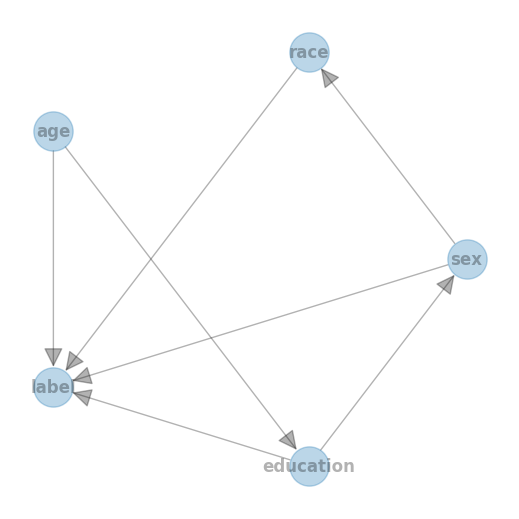

In [10]:
flai_graph.plot(directed = True)

In [11]:
flai_graph.calculate_cpd()

In [12]:
import numpy as np
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
{n : list(np.round(infer.query(variables=[n], evidence={}).values*100,2)) for n in flai_graph.graph['model'].nodes()}

{'sex': [33.15, 66.85],
 'race': [14.5, 85.5],
 'age': [5.14, 24.58, 26.47, 21.96, 13.55, 6.25, 2.05],
 'label': [76.57, 23.43],
 'education': [5.22, 2.84, 3.71, 1.35, 32.32, 22.27, 4.22, 3.28, 24.79]}

In [26]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['label'], evidence={
                                'sex':1})
print(q.scope())
print(q.values)
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['label'], evidence={
                                'sex':0})
print(q.scope())
print(q.values)

NameError: name 'flai_graph' is not defined

In [14]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['label'], evidence={
                                'race':1})
print(q.scope())
print(q.values)
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['label'], evidence={
                                'race':0})
print(q.scope())
print(q.values)

['label']
[0.75426588 0.24573412]
['label']
[0.83289591 0.16710409]


In [15]:
import bnlearn as bn
data_pred = flai_dataset.data[list(flai_graph.graph['model'].nodes())]
out = bn.predict(flai_graph.graph, data_pred, variables = ['label'])
flai_dataset.data['Predicted'] = out.label

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 242/242 [00:00<00:00, 483.95it/s]


In [16]:
result_metrics = flai_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                            'race' : {'privileged' : 1, 'unprivileged' : 0}})
result_metrics

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


{'model': {'ACC': 0.8044306129970108,
  'TN': 34716,
  'FP': 2439,
  'FN': 7113,
  'TP': 4574,
  'TPR': 0.3913750320869342,
  'FPR': 0.06564392410173597,
  'FNR': 0.6086249679130658,
  'PPP': 0.14358543876172147},
 'sex': {'privileged': {'ACC': 0.7616232771822359,
   'TN': 20293,
   'FP': 2439,
   'FN': 5344,
   'TP': 4574,
   'TPR': 0.46118168985682595,
   'FPR': 0.1072936829139539,
   'FNR': 0.538818310143174,
   'PPP': 0.21479326186830014},
  'unprivileged': {'ACC': 0.8907485177865613,
   'TN': 14423,
   'FP': 0,
   'FN': 1769,
   'TP': 0,
   'TPR': 0.0,
   'FPR': 0.0,
   'FNR': 1.0,
   'PPP': 0.0},
  'fair_metrics': {'EOD': -0.46118168985682595,
   'DI': 0.0,
   'SPD': -0.21479326186830014,
   'OD': -0.5684753727707799}},
 'race': {'privileged': {'ACC': 0.794502179014415,
   'TN': 28875,
   'FP': 2280,
   'FN': 6302,
   'TP': 4305,
   'TPR': 0.40586405204110493,
   'FPR': 0.0731824747231584,
   'FNR': 0.594135947958895,
   'PPP': 0.1576792299219386},
  'unprivileged': {'ACC': 0.862

In [17]:
df_performance,df_fairness = flai_dataset.get_df_metrics(metrics_json=result_metrics)

In [18]:
df_performance

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.804431,34716.0,2439.0,7113.0,4574.0,0.391375,0.065644,0.608625,0.143585
sex_privileged,0.761623,20293.0,2439.0,5344.0,4574.0,0.461182,0.107294,0.538818,0.214793
sex_unprivileged,0.890749,14423.0,0.0,1769.0,0.0,0.000000,0.000000,1.000000,0.000000
race_privileged,0.794502,28875.0,2280.0,6302.0,4305.0,0.405864,0.073182,0.594136,0.157679
race_unprivileged,0.862994,5841.0,159.0,811.0,269.0,0.249074,0.026500,0.750926,0.060452


In [19]:
df_fairness

,EOD,DI,SPD,OD
sex_fair_metrics,-0.461182,0.000000,-0.214793,-0.568475
race_fair_metrics,-0.156790,0.383386,-0.097227,-0.203472


## Mitigate Causal Graph

In [20]:
flai_graph.mitigate_edge_relation(sensible_feature=['sex','race'])

[('sex', 'label'),
 ('race', 'label'),
 ('age', 'label'),
 ('age', 'education'),
 ('education', 'label'),
 ('sex', 'education'),
 ('race', 'education')]

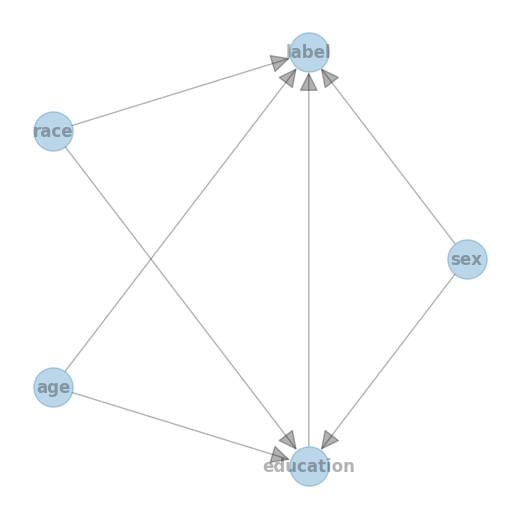

In [21]:
flai_graph.plot(directed = True)

In [22]:
flai_graph.mitigate_calculation_cpd(sensible_feature = ['sex','race'])


In [23]:
import numpy as np
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
{n : list(np.round(infer.query(variables=[n], evidence={}).values*100,2)) for n in flai_graph.graph['model'].nodes()}

{'sex': [50.0, 50.0],
 'label': [76.07, 23.93],
 'race': [50.0, 50.0],
 'age': [5.14, 24.58, 26.47, 21.96, 13.55, 6.25, 2.05],
 'education': [5.22, 2.84, 3.71, 1.35, 32.32, 22.27, 4.22, 3.28, 24.79]}

In [24]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['label'], evidence={
                                'sex':1})
print(q.scope())
print(q.values)
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['label'], evidence={
                                'sex':0})
print(q.scope())
print(q.values)

['label']
[0.76071823 0.23928177]
['label']
[0.76071823 0.23928177]


In [25]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['label'], evidence={
                                'race':1})
print(q.scope())
print(q.values)
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['label'], evidence={
                                'race':0})
print(q.scope())
print(q.values)

['label']
[0.76071823 0.23928177]
['label']
[0.76071823 0.23928177]


In [26]:
import bnlearn as bn
data_pred = flai_dataset.data[list(flai_graph.graph['model'].nodes())]
out = bn.predict(flai_graph.graph, data_pred, variables = ['label'])
flai_dataset.data['Predicted'] = out.label

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 242/242 [00:00<00:00, 499.09it/s]


In [27]:
result_metrics_mitigated = flai_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                            'race' : {'privileged' : 1, 'unprivileged' : 0}})
result_metrics_mitigated

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


{'model': {'ACC': 0.78770320625691,
  'TN': 34832,
  'FP': 2323,
  'FN': 8046,
  'TP': 3641,
  'TPR': 0.31154273979635494,
  'FPR': 0.0625218678508949,
  'FNR': 0.6884572602036451,
  'PPP': 0.1221080217845297},
 'sex': {'privileged': {'ACC': 0.7495558958652374,
   'TN': 21332,
   'FP': 1400,
   'FN': 6777,
   'TP': 3141,
   'TPR': 0.31669691470054445,
   'FPR': 0.06158718986450818,
   'FNR': 0.6833030852994555,
   'PPP': 0.1390811638591118},
  'unprivileged': {'ACC': 0.8646245059288538,
   'TN': 13500,
   'FP': 923,
   'FN': 1269,
   'TP': 500,
   'TPR': 0.2826455624646693,
   'FPR': 0.06399500797337586,
   'FNR': 0.7173544375353307,
   'PPP': 0.08788290513833992},
  'fair_metrics': {'EOD': -0.03405135223587513,
   'DI': 0.6318821521177711,
   'SPD': -0.05119825872077187,
   'OD': -0.031643534127007454}},
 'race': {'privileged': {'ACC': 0.7770461184809156,
   'TN': 29138,
   'FP': 2017,
   'FN': 7294,
   'TP': 3313,
   'TPR': 0.31234090694824174,
   'FPR': 0.06474081206868881,
   'FNR'

In [28]:
df_performance_mitigated,df_fairness_mitigated = flai_dataset.get_df_metrics(metrics_json=result_metrics_mitigated)

In [29]:
df_performance_mitigated

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.787703,34832.0,2323.0,8046.0,3641.0,0.311543,0.062522,0.688457,0.122108
sex_privileged,0.749556,21332.0,1400.0,6777.0,3141.0,0.316697,0.061587,0.683303,0.139081
sex_unprivileged,0.864625,13500.0,923.0,1269.0,500.0,0.282646,0.063995,0.717354,0.087883
race_privileged,0.777046,29138.0,2017.0,7294.0,3313.0,0.312341,0.064741,0.687659,0.127628
race_unprivileged,0.850565,5694.0,306.0,752.0,328.0,0.303704,0.051000,0.696296,0.089548


In [30]:
df_fairness_mitigated

,EOD,DI,SPD,OD
sex_fair_metrics,-0.034051,0.631882,-0.051198,-0.031644
race_fair_metrics,-0.008637,0.701633,-0.038080,-0.022378


In [31]:
fair_data = flai_graph.generate_dataset(n_samples = 100*len(flai_dataset.data), methodtype = 'bayes')

                sex      race       age  education     label  Predicted
sex        1.000000  0.101034  0.087670   0.004188  0.214628   0.073614
race       0.101034  1.000000  0.030696   0.048834  0.083710   0.040947
age        0.087670  0.030696  1.000000   0.029309  0.226896   0.301805
education  0.004188  0.048834  0.029309   1.000000  0.319691   0.504102
label      0.214628  0.083710  0.226896   0.319691  1.000000   0.324496
Predicted  0.073614  0.040947  0.301805   0.504102  0.324496   1.000000


<AxesSubplot: >

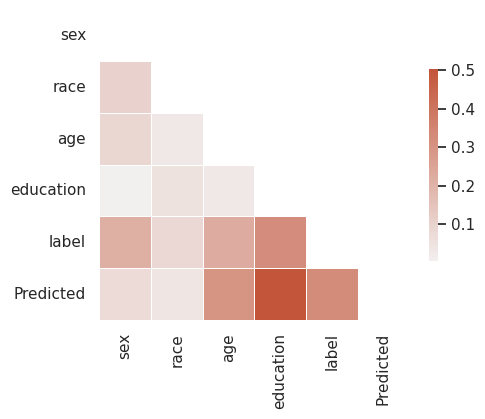

In [83]:
# Compute the correlation matrix
corr = flai_dataset.data.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

                sex     label      race       age  education
sex        1.000000 -0.000095  0.000504 -0.000531   0.000220
label     -0.000095  1.000000 -0.000327  0.226693   0.319303
race       0.000504 -0.000327  1.000000  0.000382  -0.000788
age       -0.000531  0.226693  0.000382  1.000000   0.029076
education  0.000220  0.319303 -0.000788  0.029076   1.000000


<AxesSubplot: >

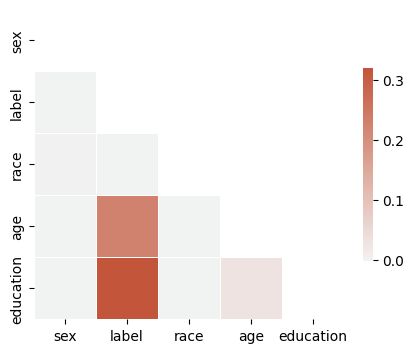

In [32]:
# Compute the correlation matrix
corr = fair_data.data.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
import bnlearn as bn
data_pred = fair_data.data[list(flai_graph.graph['model'].nodes())]
out = bn.predict(flai_graph.graph, data_pred, variables = ['label'])
fair_data.data['Predicted'] = out.label

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 252/252 [00:10<00:00, 22.94it/s]


In [34]:
result_metrics_mitigated_fair_data = fair_data.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                            'race' : {'privileged' : 1, 'unprivileged' : 0}})
result_metrics_mitigated_fair_data

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


{'model': {'ACC': 0.7877144670570411,
  'TN': 3483734,
  'FP': 232169,
  'FN': 804676,
  'TP': 363621,
  'TPR': 0.31124020689944426,
  'FPR': 0.06247983330027721,
  'FNR': 0.6887597931005558,
  'PPP': 0.12198312927398551},
 'sex': {'privileged': {'ACC': 0.787769900565267,
   'TN': 1741560,
   'FP': 116035,
   'FN': 402125,
   'TP': 181781,
   'TPR': 0.3113189451726819,
   'FPR': 0.06246517674735343,
   'FNR': 0.6886810548273181,
   'PPP': 0.12198069957784166},
  'unprivileged': {'ACC': 0.7876590607356863,
   'TN': 1742174,
   'FP': 116134,
   'FN': 402551,
   'TP': 181840,
   'TPR': 0.3111615339729736,
   'FPR': 0.062494484229740174,
   'FNR': 0.6888384660270265,
   'PPP': 0.12198555777850648},
  'fair_metrics': {'EOD': -0.00015741119970830164,
   'DI': 1.000039827617661,
   'SPD': 4.8582006648145715e-06,
   'OD': -0.00012810371732156073}},
 'race': {'privileged': {'ACC': 0.7879736666845409,
   'TN': 1742875,
   'FP': 116093,
   'FN': 401885,
   'TP': 182136,
   'TPR': 0.31186549798722

In [35]:
df_performance_mitigated_fair_data, df_fairness_mitigated_fair_data = fair_data.get_df_metrics(result_metrics_mitigated_fair_data)

In [36]:
df_performance_mitigated_fair_data

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.787714,3483734.0,232169.0,804676.0,363621.0,0.311240,0.062480,0.688760,0.121983
sex_privileged,0.787770,1741560.0,116035.0,402125.0,181781.0,0.311319,0.062465,0.688681,0.121981
sex_unprivileged,0.787659,1742174.0,116134.0,402551.0,181840.0,0.311162,0.062494,0.688838,0.121986
race_privileged,0.787974,1742875.0,116093.0,401885.0,182136.0,0.311865,0.062450,0.688135,0.122075
race_unprivileged,0.787455,1740859.0,116076.0,402791.0,181485.0,0.310615,0.062509,0.689385,0.121891


In [37]:
df_fairness_mitigated_fair_data

,EOD,DI,SPD,OD
sex_fair_metrics,-0.000157,1.000040,0.000005,-0.000128
race_fair_metrics,-0.001250,0.998487,-0.000185,-0.001191


## Train Algorithm

In [38]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
original_X = flai_dataset.data[['sex', 'race', 'age','education']]
original_y = flai_dataset.data[['label']]
mitigated_X = fair_data.data[['sex', 'race', 'age','education']]
mitigated_y = fair_data.data[['label']]


In [40]:
original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(original_X, original_y, test_size=0.5, random_state=54)
mitigated_X_train, mitigated_X_test, mitigated_y_train, mitigated_y_test = train_test_split(mitigated_X, mitigated_y, test_size=0.5, random_state=54)


In [41]:
model_original = XGBClassifier()
model_original.fit(original_X_train, original_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
model_mitigated = XGBClassifier()
model_mitigated.fit(mitigated_X_train, mitigated_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
original_y_test['Predicted'] = model_original.predict(original_X_test)
mitigated_y_test['Predicted'] = model_mitigated.predict(mitigated_X_test)

In [44]:
original_X_test[['label', 'Predicted']] = original_y_test[['label', 'Predicted']]
mitigated_X_test[['label', 'Predicted']] = mitigated_y_test[['label', 'Predicted']]


In [45]:
original_dataset = data.Data(original_X_test, transform=False)
mitigated_dataset = data.Data(mitigated_X_test, transform=False)

In [46]:
metrics_xgboost_original = original_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                           'race' : {'privileged' : 1, 'unprivileged' : 0}})
df_performance_xgboost,df_fairness_xgboost = original_dataset.get_df_metrics(metrics_xgboost_original)

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


In [47]:
df_performance_xgboost

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.804021,17210.0,1386.0,3400.0,2425.0,0.416309,0.074532,0.583691,0.156054
sex_privileged,0.760823,10035.0,1386.0,2531.0,2425.0,0.489306,0.121355,0.510694,0.232704
sex_unprivileged,0.891969,7175.0,0.0,869.0,0.0,0.000000,0.000000,1.000000,0.000000
race_privileged,0.794092,14338.0,1315.0,3000.0,2303.0,0.434282,0.084009,0.565718,0.172647
race_unprivileged,0.864069,2872.0,71.0,400.0,122.0,0.233716,0.024125,0.766284,0.055700


In [48]:
df_fairness_xgboost

,EOD,DI,SPD,OD
sex_fair_metrics,-0.489306,0.000000,-0.232704,-0.610661
race_fair_metrics,-0.200566,0.322622,-0.116948,-0.260450


In [49]:
metrics_xgboost_mitigated_fair_data = mitigated_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                            'race' : {'privileged' : 1, 'unprivileged' : 0}})
df_performance_xgboost_mitigated_fair_data,df_fairness_xgboost_mitigated_fair_data = original_dataset.get_df_metrics(metrics_xgboost_mitigated_fair_data)

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


In [50]:
df_performance_xgboost_mitigated_fair_data

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.787653,1741840.0,116319.0,402254.0,181687.0,0.311139,0.062599,0.688861,0.122029
sex_privileged,0.787784,871254.0,58225.0,200933.0,90785.0,0.311208,0.062643,0.688792,0.122020
sex_unprivileged,0.787522,870586.0,58094.0,201321.0,90902.0,0.311071,0.062555,0.688929,0.122038
race_privileged,0.787873,871810.0,58061.0,201162.0,90986.0,0.311438,0.062440,0.688562,0.121968
race_unprivileged,0.787432,870030.0,58258.0,201092.0,90701.0,0.310840,0.062759,0.689160,0.122089


In [51]:
df_fairness_xgboost_mitigated_fair_data

,EOD,DI,SPD,OD
sex_fair_metrics,-0.000137,1.000147,0.000018,-0.000225
race_fair_metrics,-0.000598,1.000997,0.000122,-0.000279


In [52]:
original_y['Predicted'] = model_mitigated.predict(original_X[['sex', 'race', 'age','education']])
original_X[['label', 'Predicted']] = original_y[['label', 'Predicted']]
original_dataset = data.Data(original_X, transform=False)
metrics_xgboost_original = original_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                           'race' : {'privileged' : 1, 'unprivileged' : 0}})
df_performance_xgboost,df_fairness_xgboost = original_dataset.get_df_metrics(metrics_xgboost_original)
df_fairness_xgboost


Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


,EOD,DI,SPD,OD
sex_fair_metrics,-0.034051,0.631882,-0.051198,-0.031644
race_fair_metrics,-0.008637,0.701633,-0.038080,-0.022378


### Explain Results

In [53]:
import shap

In [54]:
explainer_original = shap.Explainer(model_original)
explainer_mitigated = shap.Explainer(model_mitigated)

In [55]:
shap_values_orignal = explainer_original(original_dataset.data[['sex', 'race','age','education']])
shap_values_mitigated = explainer_mitigated(original_dataset.data[['sex', 'race', 'age','education']])

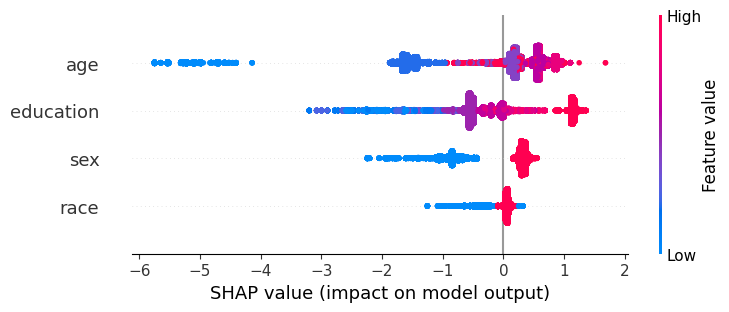

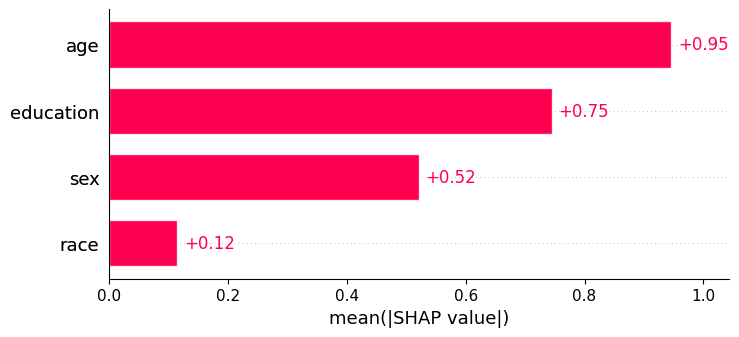

In [56]:
shap.plots.beeswarm(shap_values_orignal)
shap.plots.bar(shap_values_orignal)

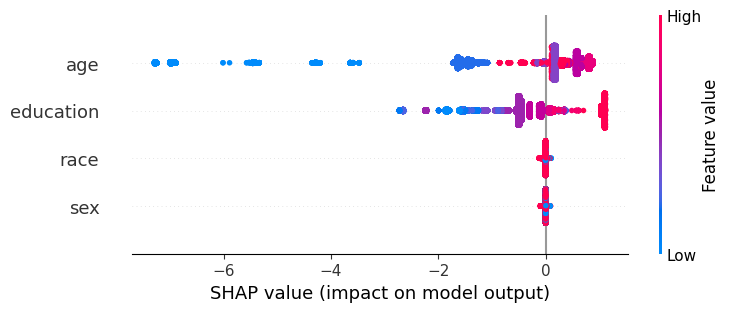

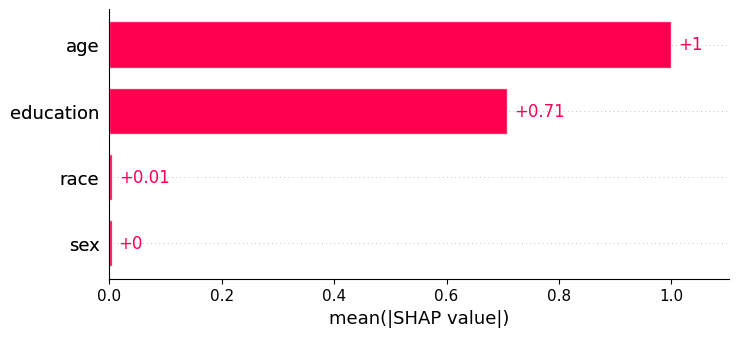

In [57]:
shap.plots.beeswarm(shap_values_mitigated)
shap.plots.bar(shap_values_mitigated)

In [58]:
shap_values_model_mitigated_dataset = explainer_original(mitigated_dataset.data[['sex', 'race', 'age','education']])
shap_values_mitigated_dataset = explainer_mitigated(mitigated_dataset.data[['sex', 'race', 'age','education']])

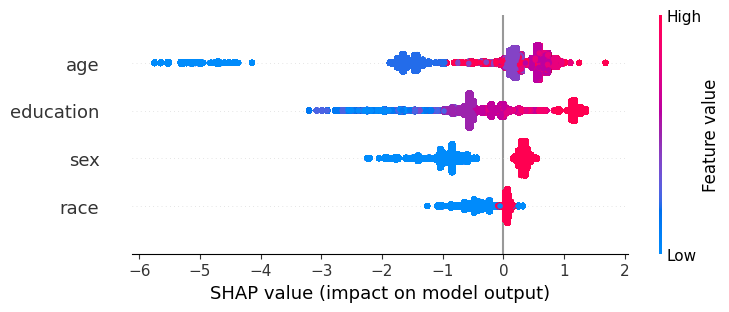

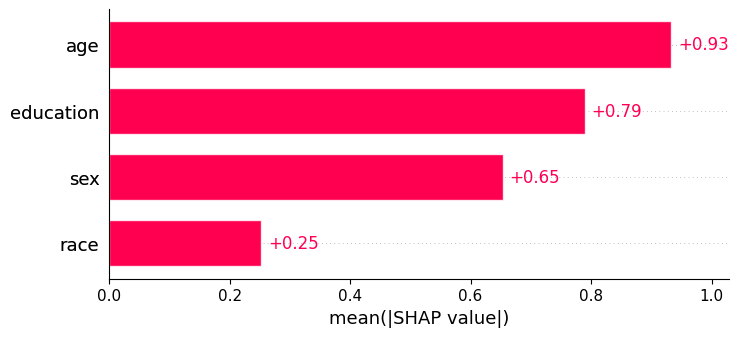

In [59]:
shap.plots.beeswarm(shap_values_model_mitigated_dataset)
shap.plots.bar(shap_values_model_mitigated_dataset)

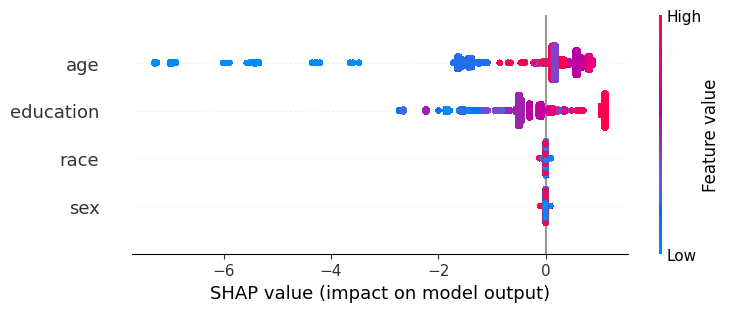

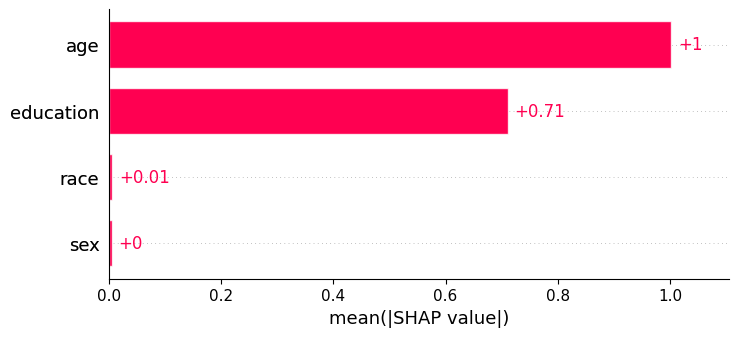

In [60]:
shap.plots.beeswarm(shap_values_mitigated_dataset)
shap.plots.bar(shap_values_mitigated_dataset)

### Test other algorithm

In [1]:
import numpy as np
from tqdm import tqdm

from aif360.datasets import BinaryLabelDataset
from aif360.datasets import AdultDataset, GermanDataset, CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions\
        import load_preproc_data_adult, load_preproc_data_german, load_preproc_data_compas
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from aif360.algorithms.preprocessing.optim_preproc_helpers.distortion_functions import get_distortion_adult
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
from aif360.algorithms.preprocessing.optim_preproc import OptimPreproc
from aif360.algorithms.preprocessing.lfr import LFR

2023-06-03 12:29:10.184751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 12:29:11.639269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-03 12:29:11.639355: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-03 12:29:11.639361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [19]:
## import dataset
dataset_used = "adult" # "adult", "german", "compas"
protected_attribute_used = 1 # 1, 2


if dataset_used == "adult":
#     dataset_orig = AdultDataset()
    if protected_attribute_used == 1:
        privileged_groups = [{'sex': 1}]
        unprivileged_groups = [{'sex': 0}]
        dataset_orig = load_preproc_data_adult(['sex'])
    else:
        privileged_groups = [{'race': 1}]
        unprivileged_groups = [{'race': 0}]
        dataset_orig = load_preproc_data_adult(['race'])
    
elif dataset_used == "german":
#     dataset_orig = GermanDataset()
    if protected_attribute_used == 1:
        privileged_groups = [{'sex': 1}]
        unprivileged_groups = [{'sex': 0}]
        dataset_orig = load_preproc_data_german(['sex'])
    else:
        privileged_groups = [{'age': 1}]
        unprivileged_groups = [{'age': 0}]
        dataset_orig = load_preproc_data_german(['age'])
    
elif dataset_used == "compas":
#     dataset_orig = CompasDataset()
    if protected_attribute_used == 1:
        privileged_groups = [{'sex': 1}]
        unprivileged_groups = [{'sex': 0}]
        dataset_orig = load_preproc_data_compas(['sex'])
    else:
        privileged_groups = [{'race': 1}]
        unprivileged_groups = [{'race': 0}]
        dataset_orig = load_preproc_data_compas(['race'])

all_metrics =  ["Statistical parity difference",
                   "Average odds difference",
                   "Equal opportunity difference"]

#random seed for calibrated equal odds prediction
np.random.seed(1)

In [20]:
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

In [4]:
from aif360.algorithms.preprocessing.optim_preproc_helpers.opt_tools import OptTools

In [192]:
optim_options = {
    "distortion_fun": get_distortion_adult,
    "epsilon": 0.05,
    "clist": [0.99, 1.99, 2.99],
    "dlist": [.1, 0.05, 0]
}
    
OP = OptimPreproc(OptTools, optim_options)

OP = OP.fit(dataset_orig_train)
dataset_transf_train = OP.transform(dataset_orig_train, transform_Y=True)

dataset_transf_train = dataset_orig_train.align_datasets(dataset_transf_train)

dataset_transf_test = OP.transform(dataset_orig_test, transform_Y = True)
dataset_transf_test = dataset_orig_test.align_datasets(dataset_transf_test)


Optimized Preprocessing: Objective converged to 0.000000


                age  education       sex      race     label
age        1.000000   0.026780  0.098672  0.026004  0.225285
education  0.026780   1.000000  0.002885  0.048687  0.317804
sex        0.098672   0.002885  1.000000  0.116147  0.212653
race       0.026004   0.048687  0.116147  1.000000  0.042083
label      0.225285   0.317804  0.212653  0.042083  1.000000


<AxesSubplot: >

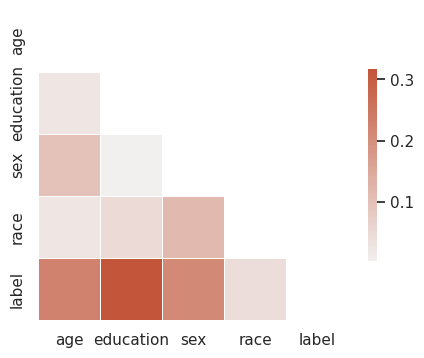

In [193]:
import seaborn as sns
sns.set_theme(style="white")

# Generate a large random dataset
df_train_transf = pd.DataFrame(dataset_transf_train.features,columns = dataset_transf_train.feature_names)

df_train_transf['label'] = dataset_transf_train.labels
df_train_transf['age'] = df_train_transf.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_train_transf['education'] = df_train_transf.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)
df_train_transf = df_train_transf[['age','education','sex','race','label']]
# Compute the correlation matrix
corr = df_train_transf.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [194]:
model_op = XGBClassifier()
model_op.fit(df_train_transf[['sex', 'race', 'age','education']], df_train_transf['label'])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [195]:
df_test = pd.DataFrame(dataset_transf_test.features,columns = dataset_transf_test.feature_names)

df_test['label'] = dataset_transf_test.labels
df_test['age'] = df_test.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_test['education'] = df_test.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)
df_test = df_test[['age','education','sex','race','label']]

In [196]:
df_test['Predicted'] = model_op.predict(df_test[['sex', 'race', 'age','education']])


In [197]:
op_dataset = data.Data(df_test, transform=False)

metrics_xgboost_mitigated_fair_data = op_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                            'race' : {'privileged' : 1, 'unprivileged' : 0}})
df_performance_op,df_fairness_op = op_dataset.get_df_metrics(metrics_xgboost_mitigated_fair_data)

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


In [198]:
df_performance_op

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.805637,10231.0,853.0,1995.0,1574.0,0.441020,0.076958,0.558980,0.165632
sex_privileged,0.758025,5840.0,835.0,1517.0,1528.0,0.501806,0.125094,0.498194,0.243107
sex_unprivileged,0.899453,4391.0,18.0,478.0,46.0,0.087786,0.004083,0.912214,0.012974
race_privileged,0.796993,8622.0,774.0,1778.0,1397.0,0.440000,0.082375,0.560000,0.172699
race_unprivileged,0.857829,1609.0,79.0,217.0,177.0,0.449239,0.046801,0.550761,0.122959


In [199]:
df_fairness_op

,EOD,DI,SPD,OD
sex_fair_metrics,-0.414020,0.053367,-0.230133,-0.535031
race_fair_metrics,0.009239,0.711982,-0.049740,-0.026336


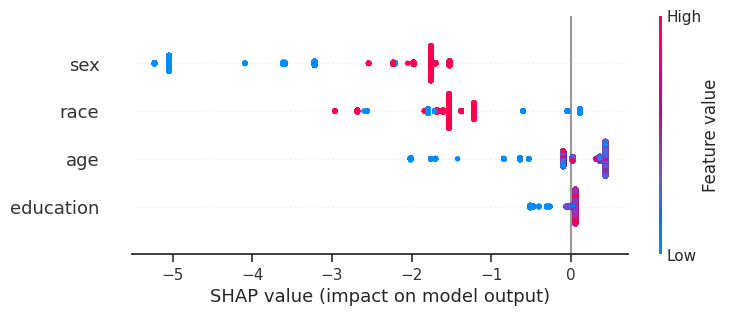

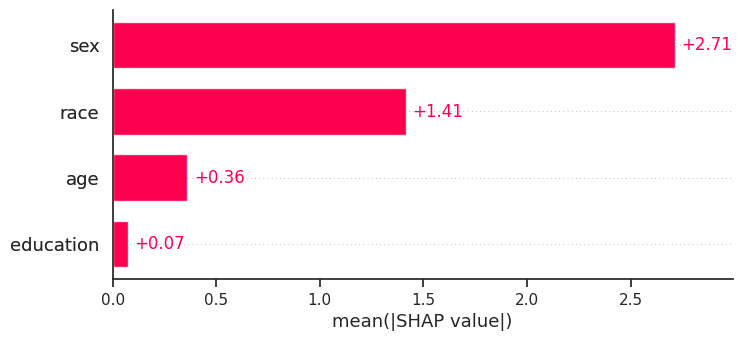

In [200]:
explainer_op = shap.Explainer(model_op)
shap_values_op = explainer_op(df_test[['age','education','sex','race']])
shap.plots.beeswarm(shap_values_op)
shap.plots.bar(shap_values_op)

In [21]:
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

In [22]:
unprivileged_groups

[{'sex': 0}]

In [23]:

RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(dataset_orig_train)
dataset_transf_train = RW.transform(dataset_orig_train)

In [24]:
dataset_transf_train.instance_weights

array([0.85338095, 1.09242733, 0.85338095, ..., 1.09242733, 0.79003868,
       0.79003868])

In [15]:
dataset_transf_train.instance_weights * df_train_transf['age']

0        2.703383
1        0.901128
2        5.094724
3        5.406766
4        2.037890
           ...   
34184    2.037890
34185    2.037890
34186    4.075780
34187    3.779284
34188    3.779284
Name: age, Length: 34189, dtype: float64

In [11]:
df_train_transf

,age,education,sex,race,label
0,3,0,0.0,0.0,0.0
1,1,4,1.0,0.0,0.0
2,5,0,0.0,1.0,0.0
3,6,8,1.0,0.0,0.0
4,2,4,1.0,1.0,0.0
...,...,...,...,...,...
34184,2,4,1.0,1.0,0.0
34185,2,8,1.0,1.0,0.0
34186,4,4,1.0,1.0,0.0
34187,4,8,1.0,1.0,1.0


                age  education           sex      race         label
age        1.000000   0.033874  3.735695e-02  0.032389  2.314625e-01
education  0.033874   1.000000 -7.246182e-02  0.048471  3.212536e-01
sex        0.037357  -0.072462  1.000000e+00  0.084061 -3.819803e-17
race       0.032389   0.048471  8.406112e-02  1.000000  8.004913e-02
label      0.231463   0.321254 -3.819803e-17  0.080049  1.000000e+00


<AxesSubplot: >

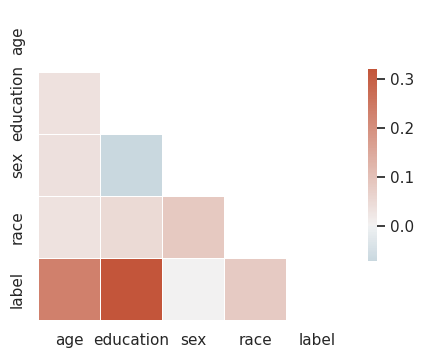

In [25]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="white")

# Generate a large random dataset
df_train_transf = pd.DataFrame(dataset_transf_train.features,columns = dataset_transf_train.feature_names)

df_train_transf['label'] = dataset_transf_train.labels
df_train_transf['age'] = df_train_transf.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_train_transf['education'] = df_train_transf.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)

df_train_transf = df_train_transf[['age','education','sex','race','label']]
#df_train_transf['age'] = dataset_transf_train.instance_weights * df_train_transf['age']
#df_train_transf['education'] = dataset_transf_train.instance_weights * df_train_transf['education']
#df_train_transf['sex'] = dataset_transf_train.instance_weights * df_train_transf['sex']
df_train_transf['sex'] = dataset_transf_train.instance_weights * df_train_transf['sex']
#df_train_transf['age'] = dataset_transf_train.instance_weights * df_train_transf['age']

# Compute the correlation matrix
corr = df_train_transf.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [205]:
model_rw = XGBClassifier()
model_rw.fit(df_train_transf[['sex', 'race', 'age','education']], df_train_transf['label'],sample_weight = dataset_transf_train.instance_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [206]:
df_test = pd.DataFrame(dataset_orig_test.features,columns = dataset_orig_test.feature_names)

df_test['label'] = dataset_orig_test.labels
df_test['age'] = df_test.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_test['education'] = df_test.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)
df_test = df_test[['age','education','sex','race','label']]

In [207]:
df_test['Predicted'] = model_rw.predict(df_test[['sex', 'race', 'age','education']])


In [208]:
rw_dataset = data.Data(df_test, transform=False)

metrics_xgboost_mitigated_fair_data = rw_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                            'race' : {'privileged' : 1, 'unprivileged' : 0}})
df_performance_op,df_fairness_op = rw_dataset.get_df_metrics(metrics_xgboost_mitigated_fair_data)

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


In [209]:
df_performance_op

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.805569,10343.0,810.0,2039.0,1461.0,0.417429,0.072626,0.582571,0.154985
sex_privileged,0.759670,6002.0,810.0,1551.0,1461.0,0.485060,0.118908,0.514940,0.231169
sex_unprivileged,0.898944,4341.0,0.0,488.0,0.0,0.000000,0.000000,1.000000,0.000000
race_privileged,0.797697,8659.0,662.0,1868.0,1317.0,0.413501,0.071022,0.586499,0.158244
race_unprivileged,0.851421,1684.0,148.0,171.0,144.0,0.457143,0.080786,0.542857,0.136004


In [210]:
df_fairness_op

,EOD,DI,SPD,OD
sex_fair_metrics,-0.485060,0.000000,-0.231169,-0.603968
race_fair_metrics,0.043642,0.859456,-0.022240,0.053406


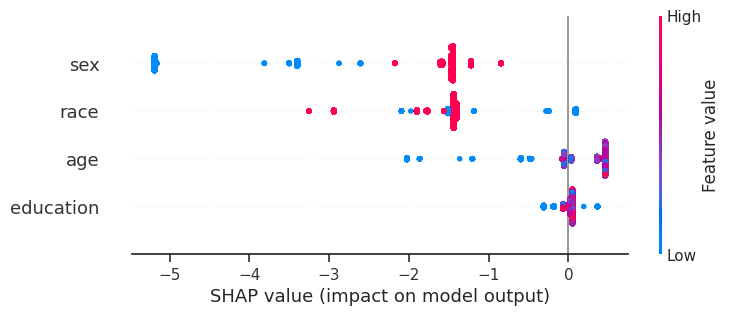

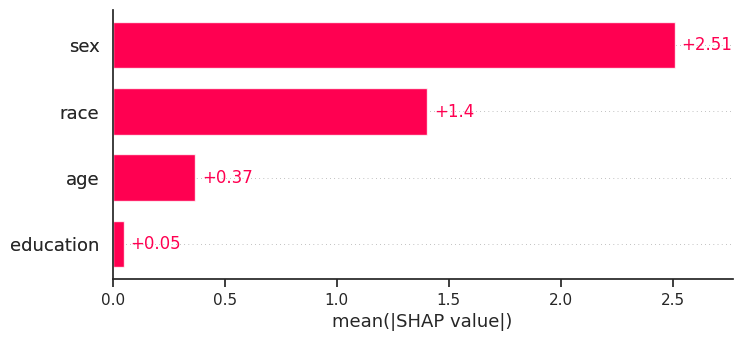

In [211]:
explainer_rw = shap.Explainer(model_rw)
shap_values_rw = explainer_rw(df_test[['age','education','sex','race']])
shap.plots.beeswarm(shap_values_rw)
shap.plots.bar(shap_values_rw)

In [212]:
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

                age  education       sex      race     label
age        1.000000   0.030006  0.087317  0.032936  0.228385
education  0.030006   1.000000  0.009584  0.047616  0.317851
sex        0.087317   0.009584  1.000000  0.099938  0.218556
race       0.032936   0.047616  0.099938  1.000000  0.081437
label      0.228385   0.317851  0.218556  0.081437  1.000000


<AxesSubplot: >

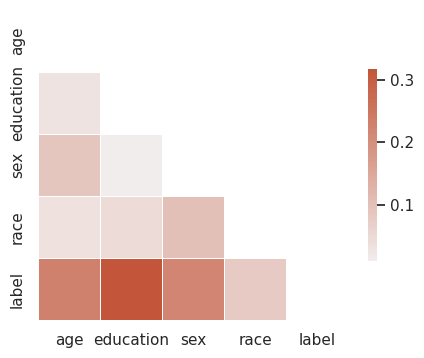

In [213]:
import seaborn as sns
sns.set_theme(style="white")

# Generate a large random dataset
df_train_transf = pd.DataFrame(dataset_orig_train.features,columns = dataset_orig_train.feature_names)

df_train_transf['label'] = dataset_orig_train.labels

df_train_transf['age'] = df_train_transf.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_train_transf['education'] = df_train_transf.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)
df_train_transf = df_train_transf[['age','education','sex','race','label']]

# Compute the correlation matrix
corr = df_train_transf.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [214]:
dataset_orig_train.feature_names

['race',
 'sex',
 'Age (decade)=10',
 'Age (decade)=20',
 'Age (decade)=30',
 'Age (decade)=40',
 'Age (decade)=50',
 'Age (decade)=60',
 'Age (decade)=>=70',
 'Education Years=6',
 'Education Years=7',
 'Education Years=8',
 'Education Years=9',
 'Education Years=10',
 'Education Years=11',
 'Education Years=12',
 'Education Years=<6',
 'Education Years=>12']

In [215]:
TR = LFR(unprivileged_groups=unprivileged_groups,
         privileged_groups=privileged_groups,
         k=10, Ax=0.1, Ay=1.0, Az=2.0,
         verbose=1
        )
dataset_orig_train.features = df_train_transf[['age','education','sex','race']].values
dataset_orig_train.feature_names = ['age','education','sex','race']

TR = TR.fit(dataset_orig_train)

step: 0, loss: 2.1239118796746412, L_x: 13.931138657050843,  L_y: 0.7220453372897138,  L_z: 0.004376338339921635
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           50     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12391D+00    |proj g|=  1.67736D-01

At iterate    1    f=  1.98371D+00    |proj g|=  9.55684D-02

At iterate    2    f=  1.81574D+00    |proj g|=  1.01423D-01
step: 250, loss: 1.686952472971299, L_x: 11.06174663409788,  L_y: 0.5740467206286314,  L_z: 0.003365544466439882

At iterate    3    f=  1.68695D+00    |proj g|=  1.57708D-01

At iterate    4    f=  7.09546D-01    |proj g|=  1.94260D-01

At iterate    5    f=  6.54995D-01    |proj g|=  1.27642D-01
step: 500, loss: 0.6451839591882133, L_x: 1.3631773461244499,  L_y: 0.4956013205182288,  L_z: 0.006632452028769695

At iterate    6    f=  6.45184D-01    |proj g|=  7.28022D-02

At iterate    7    f=  6.25945D-01    |proj g|=  6.48578D

In [216]:
df_test = pd.DataFrame(dataset_orig_test.features,columns = dataset_orig_test.feature_names)

df_test['label'] = dataset_orig_test.labels
df_test['age'] = df_test.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_test['education'] = df_test.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)
df_test = df_test[['age','education','sex','race','label']]
dataset_orig_test.features = df_test[['age','education','sex','race']].values
dataset_orig_test.feature_names = ['age','education','sex','race']


In [217]:
# Transform training data and align features
dataset_transf_train = TR.transform(dataset_orig_train)
dataset_transf_test = TR.transform(dataset_orig_test)

                age  education       sex      race     label
age        1.000000   0.003018  0.186372 -0.584283  0.182666
education  0.003018   1.000000  0.214389 -0.683388  0.591203
sex        0.186372   0.214389  1.000000 -0.373957  0.536011
race      -0.584283  -0.683388 -0.373957  1.000000 -0.606788
label      0.182666   0.591203  0.536011 -0.606788  1.000000


<AxesSubplot: >

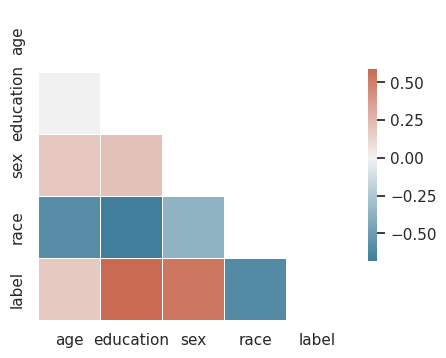

In [218]:
import seaborn as sns
sns.set_theme(style="white")

# Generate a large random dataset
df_train_transf = pd.DataFrame(dataset_transf_train.features,columns = dataset_transf_train.feature_names)

df_train_transf['label'] = dataset_transf_train.labels
'''
df_train_transf['age'] = df_train_transf.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_train_transf['education'] = df_train_transf.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)
'''
df_train_transf = df_train_transf[['age','education','sex','race','label']]

# Compute the correlation matrix
corr = df_train_transf.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [219]:
df_test = pd.DataFrame(dataset_orig_test.features,columns = dataset_orig_test.feature_names)

df_test['label'] = dataset_orig_test.labels

df_test = df_test[['age','education','sex','race','label']]
dataset_orig_test.features = df_test[['age','education','sex','race']].values
dataset_orig_test.feature_names = ['age','education','sex','race']

In [220]:
model_lfr = XGBClassifier()
model_lfr.fit(dataset_transf_train.features, dataset_transf_train.labels)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [221]:
df_test['Predicted'] = model_lfr.predict(dataset_transf_test.features)

In [222]:
lfr_dataset = data.Data(df_test, transform=False)

metrics_xgboost_mitigated_fair_data = lfr_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                            'race' : {'privileged' : 1, 'unprivileged' : 0}})
df_performance_op,df_fairness_op = lfr_dataset.get_df_metrics(metrics_xgboost_mitigated_fair_data)

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


In [223]:
df_performance_op

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.800860,10378.0,750.0,2168.0,1357.0,0.384965,0.067398,0.615035,0.143793
sex_privileged,0.759610,6053.0,748.0,1597.0,1357.0,0.459377,0.109984,0.540623,0.215787
sex_unprivileged,0.883013,4325.0,2.0,571.0,0.0,0.000000,0.000462,1.000000,0.000408
race_privileged,0.792853,8668.0,634.0,1957.0,1249.0,0.389582,0.068157,0.610418,0.150544
race_unprivileged,0.847552,1710.0,116.0,211.0,108.0,0.338558,0.063527,0.661442,0.104429


In [224]:
df_fairness_op

,EOD,DI,SPD,OD
sex_fair_metrics,-0.459377,0.001892,-0.215378,-0.568899
race_fair_metrics,-0.051024,0.693679,-0.046115,-0.055655


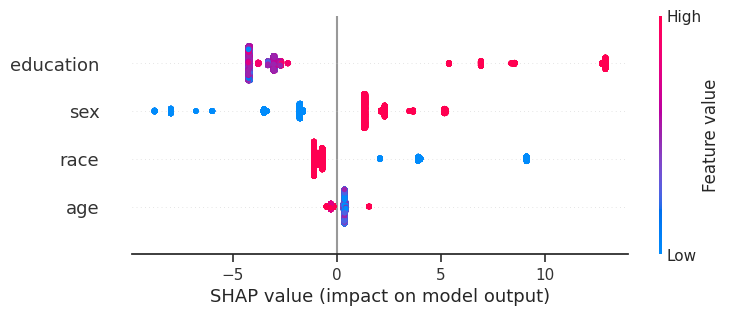

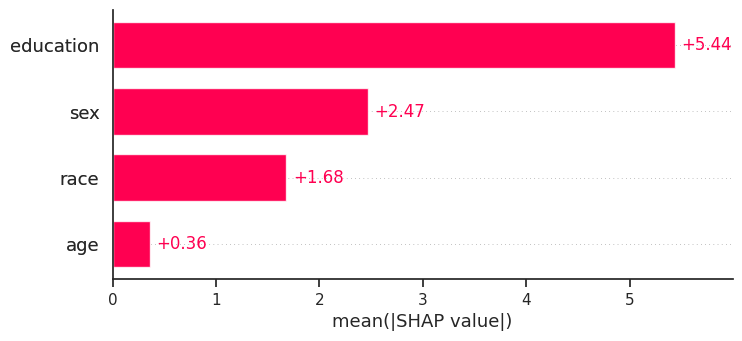

In [225]:
explainer_lfr = shap.Explainer(model_lfr)
shap_values_lfr = explainer_lfr(df_test[['age','education','sex','race']])
shap.plots.beeswarm(shap_values_lfr)
shap.plots.bar(shap_values_lfr)

In [226]:
from dalex.fairness import resample
import dalex as dx

In [227]:
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

                age  education       sex      race     label
age        1.000000   0.033135  0.088453  0.034872  0.231719
education  0.033135   1.000000  0.002489  0.049114  0.322881
sex        0.088453   0.002489  1.000000  0.104261  0.213464
race       0.034872   0.049114  0.104261  1.000000  0.083671
label      0.231719   0.322881  0.213464  0.083671  1.000000


<AxesSubplot: >

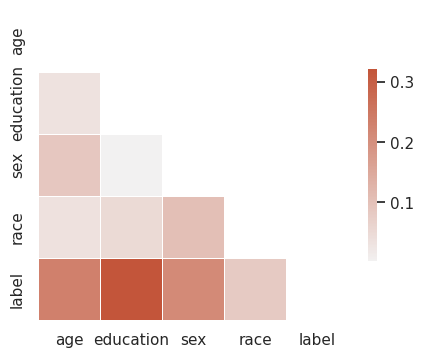

In [237]:
import seaborn as sns
sns.set_theme(style="white")

# Generate a large random dataset
df_train_transf = pd.DataFrame(dataset_orig_train.features,columns = dataset_orig_train.feature_names)

df_train_transf['label'] = dataset_orig_train.labels

df_train_transf['age'] = df_train_transf.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_train_transf['education'] = df_train_transf.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)
df_train_transf = df_train_transf[['age','education','sex','race','label']]

# Compute the correlation matrix
corr = df_train_transf.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [248]:
indices_uniform = resample(df_train_transf.sex, df_train_transf.label, verbose = False)


In [249]:
len(np.unique(indices_uniform))

31255

In [250]:
len(df_train_transf)

34189

In [251]:
len( df_train_transf.iloc[indices_uniform])

34189

                age  education       sex      race     label
age        1.000000   0.025479  0.046388  0.035931  0.214355
education  0.025479   1.000000 -0.068313  0.041943  0.336162
sex        0.046388  -0.068313  1.000000  0.086779  0.000032
race       0.035931   0.041943  0.086779  1.000000  0.070587
label      0.214355   0.336162  0.000032  0.070587  1.000000


<AxesSubplot: >

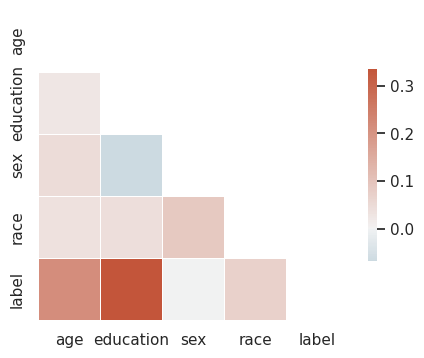

In [252]:
# Compute the correlation matrix
corr = df_train_transf.iloc[indices_uniform].corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Compute the correlation matrix
corr = df_train_transf.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [230]:
model_resample = XGBClassifier()
model_resample.fit(df_train_transf[['age','education','sex','race']].values[indices_uniform], df_train_transf['label'][indices_uniform])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [231]:
df_test = pd.DataFrame(dataset_orig_test.features,columns = dataset_orig_test.feature_names)

df_test['label'] = dataset_orig_test.labels
df_test['age'] = df_test.apply(lambda row: 0 if row['Age (decade)=10'] == 1 
                            else 1 if row['Age (decade)=20'] == 1 
                            else 2 if row['Age (decade)=30'] == 1
                            else 3 if row['Age (decade)=40'] == 1
                            else 4 if row['Age (decade)=50'] == 1
                            else 5 if row['Age (decade)=60'] == 1
                            else 6 if row['Age (decade)=>=70'] == 1
                            else None,axis = 1)
df_test['education'] = df_test.apply(lambda row: 0 if row['Education Years=<6'] == 1 
                                  else 1 if row['Education Years=6'] == 1 
                                  else 2 if row['Education Years=7'] == 1 
                                  else 3 if row['Education Years=8'] == 1 
                                  else 4 if row['Education Years=9'] == 1 
                                  else 5 if row['Education Years=10'] == 1 
                                  else 6 if row['Education Years=11'] == 1 
                                  else 7 if row['Education Years=12'] == 1
                                  else 8 if row['Education Years=>12'] == 1  
                                  else None,axis = 1)
df_test = df_test[['age','education','sex','race','label']]

In [232]:
df_test['Predicted'] = model_resample.predict(df_test[['age','education','sex','race']])

In [233]:
resample_dataset = data.Data(df_test, transform=False)

metrics_xgboost_mitigated_fair_data = resample_dataset.fairness_metrics(target_column='label', predicted_column = 'Predicted',
                            columns_fair = {'sex' : {'privileged' : 1, 'unprivileged' : 0},
                                            'race' : {'privileged' : 1, 'unprivileged' : 0}})
df_performance_op,df_fairness_op = resample_dataset.get_df_metrics(metrics_xgboost_mitigated_fair_data)

Calculating metrics for : sex  the value :  1
Calculating metrics for : sex  the value :  0
Calculating metrics for : race  the value :  1
Calculating metrics for : race  the value :  0


In [234]:
df_performance_op

,ACC,TN,FP,FN,TP,TPR,FPR,FNR,PPP
model,0.798335,10254.0,863.0,2092.0,1444.0,0.408371,0.077629,0.591629,0.157442
sex_privileged,0.752930,6007.0,863.0,1582.0,1444.0,0.477198,0.125619,0.522802,0.233124
sex_unprivileged,0.892790,4247.0,0.0,510.0,0.0,0.000000,0.000000,1.000000,0.000000
race_privileged,0.791567,8622.0,693.0,1917.0,1290.0,0.402245,0.074396,0.597755,0.158361
race_unprivileged,0.838104,1632.0,170.0,175.0,154.0,0.468085,0.094340,0.531915,0.152041


In [235]:
df_fairness_op

,EOD,DI,SPD,OD
sex_fair_metrics,-0.477198,0.000000,-0.233124,-0.602816
race_fair_metrics,0.065840,0.960091,-0.006320,0.085784


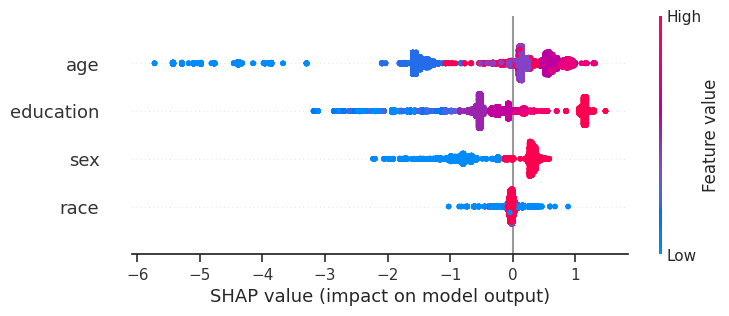

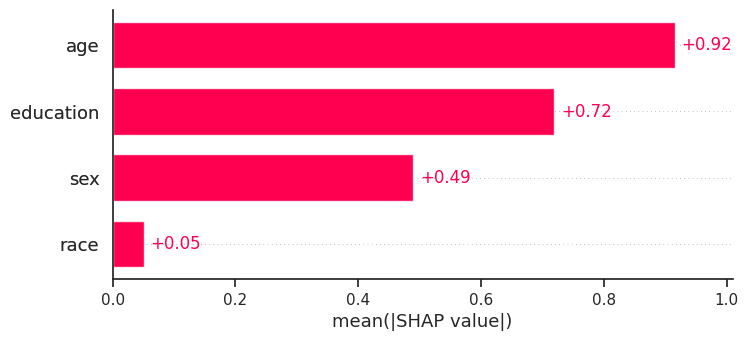

In [236]:
explainer_resample = shap.Explainer(model_resample)
shap_values_resample = explainer_resample(df_test[['age','education','sex','race']])
shap.plots.beeswarm(shap_values_resample)
shap.plots.bar(shap_values_resample)